## 1. Column-Wise Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [9]:
import pandas as pd

df = pd.read_excel(r"D:\YUKTA\project\Axion.ray\DA -Task 2..xlsx", engine='openpyxl')


In [10]:
# Display basic info about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_

In [11]:
# Describe numerical columns
print("\nNumerical Summary:")
print(df.describe())


Numerical Summary:
       TRANSACTION_ID          REPAIR_DATE  DEALER_REGION  REPAIR_AGE  \
count      100.000000                  100      100.00000  100.000000   
mean     13036.900000  2024-01-22 07:26:24        1.09000   14.940000   
min      13021.000000  2024-01-02 00:00:00        1.00000    0.000000   
25%      13027.750000  2024-01-12 00:00:00        1.00000    5.000000   
50%      13036.000000  2024-01-24 12:00:00        1.00000   12.000000   
75%      13041.250000  2024-02-01 00:00:00        1.00000   21.000000   
max      13081.000000  2024-02-07 00:00:00        4.00000   50.000000   
std         12.028166                  NaN        0.51434   12.367945   

                  KM  COMPLAINT_CD_CSI  ORD_SELLING_SRC_CD  GLOBAL_LABOR_CODE  \
count     100.000000             100.0          100.000000         100.000000   
mean    24914.230000               0.0           24.590000         251.900000   
min         3.000000               0.0           11.000000          20.000000  

In [12]:
# Check unique values and data types for each column
print("\nColumn-Wise Unique Values and Data Types:")
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Unique Values: {df[col].nunique()}")
    print(f"Sample Values: {df[col].dropna().unique()[:5]}")


Column-Wise Unique Values and Data Types:

Column: VIN
Data Type: object
Unique Values: 98
Sample Values: ['3HCFDDE89SH220903' '1HRFFEE8XSZ230636' '1HYKSMRK6SZ000990'
 '3HCFDFEL3SH241701' '1HRFFHEL1RZ181474']

Column: TRANSACTION_ID
Data Type: int64
Unique Values: 32
Sample Values: [13021 13028 13035 13026 13071]

Column: CORRECTION_VERBATIM
Data Type: object
Unique Values: 93
Sample Values: ['REPLACED STEERING WHEEL NOW OKAY'
 "CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE."
 'APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED S

## 2. Data Cleaning

### Handle missing values

### Drop columns with more than 50% missing values

In [14]:
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

In [17]:
# Fill missing values in numerical columns with median
df_cleaned.loc[:, num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

In [19]:
# Fill missing values in categorical columns with mode
# Make a copy to avoid Setting With Copy Warning
df_cleaned = df_cleaned.copy()

# Handle categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns

# Convert all to string and fill missing values with mode
df_cleaned[cat_cols] = df_cleaned[cat_cols].astype(str)
for col in cat_cols:
    df_cleaned.loc[:, col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


In [20]:
# Standardize categorical text (e.g., capitalization)
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.str.upper().str.strip())

In [21]:
# Convert numerical columns to correct format
for col in num_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [22]:
#Remove outliers using IQR method
for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned[(df_cleaned[col] >= Q1 - 1.5 * IQR) & (df_cleaned[col] <= Q3 + 1.5 * IQR)]

In [25]:
df_cleaned

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,SPECIAL ORDER PART [ STEERING WHEEL HEATED STE...,2024-01-05,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S1212982CKJX2188,2808882287,4,1,N,CF10543,1500,15.0,0,1
10,1HCFDHE86SZ274242,13023,GAINED ACCESS AND REMOVED OLD STEERING WHEEL A...,C/S: REMOVED STEERING WHEEL TO GAIN ACCESS TO ...,2024-01-09,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,R2212281CNJX0022,2809222210,6,1,N,CF10543,1500,10.0,0,1
17,1H1FZ6S00N4109597,13025,"REPLACE STEERING WHEEL CHECK OK 1699-,0130",HEATED STEERING WHEEL INOP. WHEN YOU HIT THE B...,2024-01-11,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,GLOBAL GAMMA,4 DOOR SEDAN,C121,...,21210129IKBP0429,2809122794,4,1,N,1FG48,PREMIER,21.0,0,1
20,3HRFFCER3NH528824,13025,"PRA APPROVED, PRA #495794600000 FOUND THE STEE...",CUSTOMER STATES STITCHING ON STEERING WHEEL IS...,2024-01-11,WHEEL ASM-STRG *BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,S1220791CNJX0210,2809294191,4,1,N,TF10543,1500,10.0,0,1
25,1HCFDEED3SZ308171,13037,REPLACED STEERING WHEEL,WRAP ON THE STEEERING WHEEL IS PEELING ***NEED...,2024-01-12,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,R2210822CKJX0278,2820422129,4,1,Y,CF10543,1500,10.0,0,1
28,1HCFYEED6NZ182017,13040,0130 LABOR 0.4 -REMOVED AND REPLACED STEERING ...,TRIM OR MOULDING DIAGNOSIS TRIM OR MOULDING DI...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,B2220222XNLX9720,2809401941,6,1,N,CF18543,1500,10.0,0,1
29,1HCFDEED5SZ117691,13025,"PER LAST REPAIR ORDER, REPLACED STEERING WHEEL...",INSTALL SOP. CUSTOMER STATES STITCHING ON STEE...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,R2222892CKJX0778,2809189012,4,1,N,CF10543,1500,10.0,0,1
31,1HR49SE7XRF103023,13026,"INSPECTED STEERING WHEEL, FOUND LEATHER PEELIN...",CUST STATES STEERING WHEEL MATERUIAL DELAMINAT...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGH,...,Y0210881MSFX0080,2809417819,4,1,Y,TF20743,2500,10.0,0,1


## Identifying Critical Columns + Visualizations

In [26]:
# Q3: Identifying Critical Columns and Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Top 5 critical columns based on business relevance
critical_cols = ['REPAIR_DATE', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'TOTALCOST', 'CUSTOMER_VERBATIM', 'VIN']

### Explanation:-So, a distribution chart helps you visualize how data points are spread, detect patterns, and find unusual values.

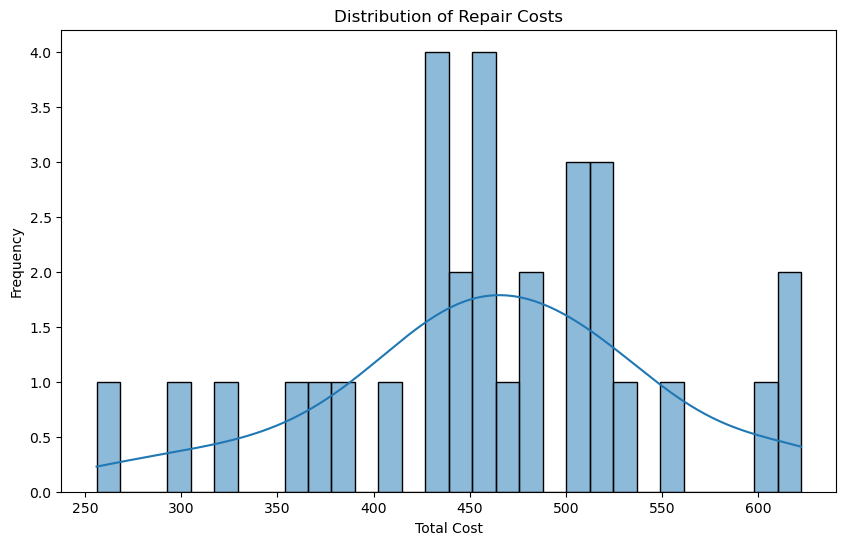

In [29]:
# Visualization 1: Distribution of repair costs
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TOTALCOST'], bins=30, kde=True)
plt.title("Distribution of Repair Costs")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()

#### Explanation:- Each bar's length indicates the frequency of that particular repair type.
#### Stakeholders may easily observe which repair types are more and less common thanks to it.

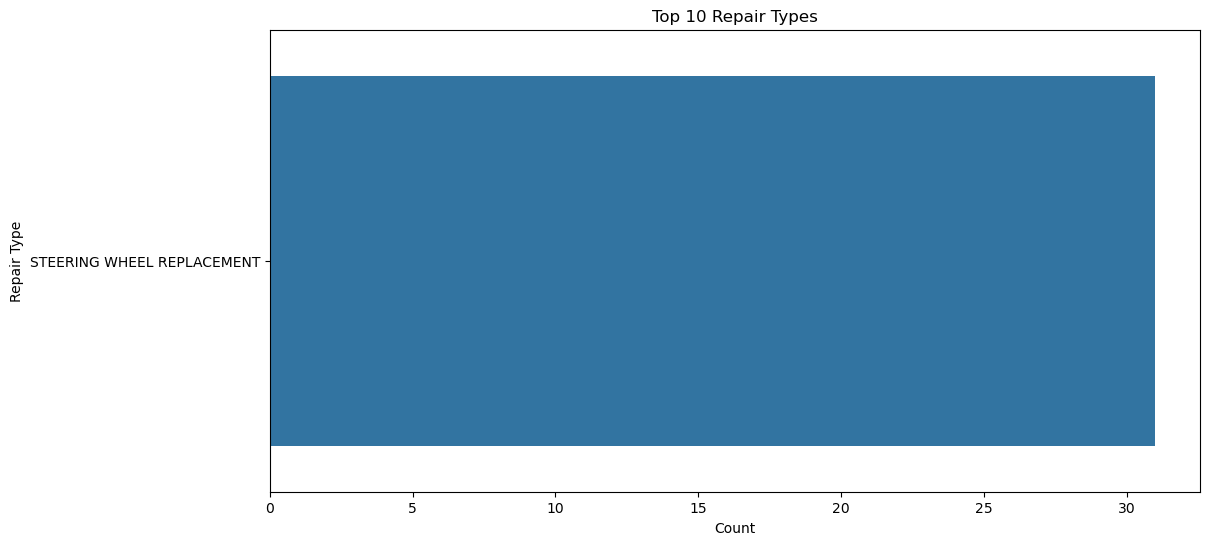

In [30]:
# Visualization 2: Most common repair types
plt.figure(figsize=(12, 6))
top_repairs = df_cleaned['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().head(10)
sns.barplot(x=top_repairs.values, y=top_repairs.index)
plt.title("Top 10 Repair Types")
plt.xlabel("Count")
plt.ylabel("Repair Type")
plt.show()

#### Explanation:-Shows the trend of repairs over time, helping to see which months have more or fewer repairs.

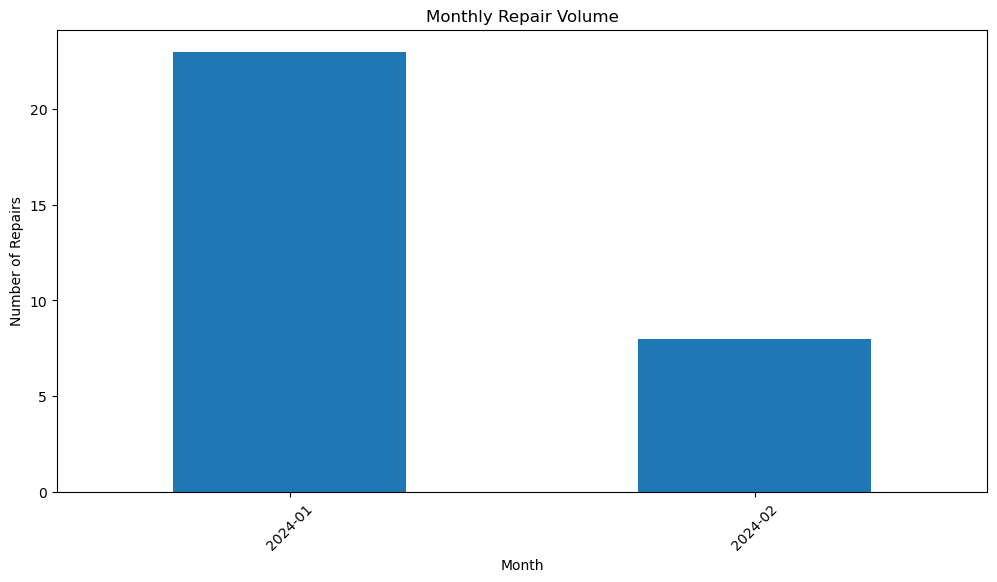

In [33]:
# Visualization 3: Monthly repair trends
df_cleaned['REPAIR_DATE'] = pd.to_datetime(df_cleaned['REPAIR_DATE'], errors='coerce')
df_cleaned['Month'] = df_cleaned['REPAIR_DATE'].dt.to_period('M')
monthly_repairs = df_cleaned['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_repairs.plot(kind='bar')
plt.title("Monthly Repair Volume")
plt.xlabel("Month")
plt.ylabel("Number of Repairs")
plt.xticks(rotation=45)
plt.show()

## 4. Generating Tags from Free Text

In [36]:
# Q4: Generating Tags from Free Text
from sklearn.feature_extraction.text import CountVectorizer 

In [37]:
# Combine free text fields
text_data = df_cleaned['CUSTOMER_VERBATIM'].fillna('') + " " + df_cleaned['CORRECTION_VERBATIM'].fillna('')

In [38]:
# Create bag-of-words model
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(text_data)

In [39]:
# Extract top tags
tags = vectorizer.get_feature_names_out()
print("\nTop Tags Extracted from Free Text:")
print(tags)


Top Tags Extracted from Free Text:
['0130' 'advise' 'apart' 'approved' 'assembly' 'authorization' 'check'
 'checked' 'codes' 'coming' 'cust' 'customer' 'diagnosis' 'does' 'el'
 'failed' 'gm' 'hand' 'heat' 'heated' 'install' 'installed' 'leather'
 'light' 'loose' 'new' 'ok' 'operation' 'order' 'pra' 'pre' 'preauth'
 'reference' 'remove' 'removed' 'repair' 'replace' 'replaced'
 'replacement' 'ro' 'sop' 'states' 'steering' 'stitching' 'tested' 'trim'
 'turn' 'turns' 'verified' 'wheel']


In [40]:
# Add tags as a new column
df_cleaned['TAGS'] = [" | ".join([tag for tag in tags if tag in row]) for row in text_data.str.lower()]

In [42]:
df_cleaned 

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,Month,TAGS
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,N,CF10543,1500,21.0,0,1,2024-01,apart | coming | el | ok | replace | replaced ...
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,Y,CF10543,1500,10.0,0,1,2024-01,coming | cust | customer | el | replace | repl...
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,SPECIAL ORDER PART [ STEERING WHEEL HEATED STE...,2024-01-05,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,4,1,N,CF10543,1500,15.0,0,1,2024-01,el | heat | heated | order | replace | replace...
10,1HCFDHE86SZ274242,13023,GAINED ACCESS AND REMOVED OLD STEERING WHEEL A...,C/S: REMOVED STEERING WHEEL TO GAIN ACCESS TO ...,2024-01-09,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,N,CF10543,1500,10.0,0,1,2024-01,assembly | authorization | check | checked | e...
17,1H1FZ6S00N4109597,13025,"REPLACE STEERING WHEEL CHECK OK 1699-,0130",HEATED STEERING WHEEL INOP. WHEN YOU HIT THE B...,2024-01-11,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,GLOBAL GAMMA,4 DOOR SEDAN,C121,...,4,1,N,1FG48,PREMIER,21.0,0,1,2024-01,0130 | check | el | heat | heated | light | ok...
20,3HRFFCER3NH528824,13025,"PRA APPROVED, PRA #495794600000 FOUND THE STEE...",CUSTOMER STATES STITCHING ON STEERING WHEEL IS...,2024-01-11,WHEEL ASM-STRG *BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,4,1,N,TF10543,1500,10.0,0,1,2024-01,apart | approved | coming | cust | customer | ...
25,1HCFDEED3SZ308171,13037,REPLACED STEERING WHEEL,WRAP ON THE STEEERING WHEEL IS PEELING ***NEED...,2024-01-12,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,4,1,Y,CF10543,1500,10.0,0,1,2024-01,el | pra | replace | replaced | steering | wheel
28,1HCFYEED6NZ182017,13040,0130 LABOR 0.4 -REMOVED AND REPLACED STEERING ...,TRIM OR MOULDING DIAGNOSIS TRIM OR MOULDING DI...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,N,CF18543,1500,10.0,0,1,2024-01,0130 | cust | customer | diagnosis | el | inst...
29,1HCFDEED5SZ117691,13025,"PER LAST REPAIR ORDER, REPLACED STEERING WHEEL...",INSTALL SOP. CUSTOMER STATES STITCHING ON STEE...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,4,1,N,CF10543,1500,10.0,0,1,2024-01,apart | coming | cust | customer | el | instal...
31,1HR49SE7XRF103023,13026,"INSPECTED STEERING WHEEL, FOUND LEATHER PEELIN...",CUST STATES STEERING WHEEL MATERUIAL DELAMINAT...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGH,...,4,1,Y,TF20743,2500,10.0,0,1,2024-01,cust | el | failed | leather | replace | repla...


## Export Cleaned Data

In [46]:
# Save as Excel file properly
df_cleaned.to_excel("cleaned_tagged_records.xlsx", index=False)


In [47]:
df_cleaned 

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,Month,TAGS
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,N,CF10543,1500,21.0,0,1,2024-01,apart | coming | el | ok | replace | replaced ...
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,Y,CF10543,1500,10.0,0,1,2024-01,coming | cust | customer | el | replace | repl...
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,SPECIAL ORDER PART [ STEERING WHEEL HEATED STE...,2024-01-05,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,4,1,N,CF10543,1500,15.0,0,1,2024-01,el | heat | heated | order | replace | replace...
10,1HCFDHE86SZ274242,13023,GAINED ACCESS AND REMOVED OLD STEERING WHEEL A...,C/S: REMOVED STEERING WHEEL TO GAIN ACCESS TO ...,2024-01-09,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,N,CF10543,1500,10.0,0,1,2024-01,assembly | authorization | check | checked | e...
17,1H1FZ6S00N4109597,13025,"REPLACE STEERING WHEEL CHECK OK 1699-,0130",HEATED STEERING WHEEL INOP. WHEN YOU HIT THE B...,2024-01-11,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,GLOBAL GAMMA,4 DOOR SEDAN,C121,...,4,1,N,1FG48,PREMIER,21.0,0,1,2024-01,0130 | check | el | heat | heated | light | ok...
20,3HRFFCER3NH528824,13025,"PRA APPROVED, PRA #495794600000 FOUND THE STEE...",CUSTOMER STATES STITCHING ON STEERING WHEEL IS...,2024-01-11,WHEEL ASM-STRG *BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,4,1,N,TF10543,1500,10.0,0,1,2024-01,apart | approved | coming | cust | customer | ...
25,1HCFDEED3SZ308171,13037,REPLACED STEERING WHEEL,WRAP ON THE STEEERING WHEEL IS PEELING ***NEED...,2024-01-12,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,4,1,Y,CF10543,1500,10.0,0,1,2024-01,el | pra | replace | replaced | steering | wheel
28,1HCFYEED6NZ182017,13040,0130 LABOR 0.4 -REMOVED AND REPLACED STEERING ...,TRIM OR MOULDING DIAGNOSIS TRIM OR MOULDING DI...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,6,1,N,CF18543,1500,10.0,0,1,2024-01,0130 | cust | customer | diagnosis | el | inst...
29,1HCFDEED5SZ117691,13025,"PER LAST REPAIR ORDER, REPLACED STEERING WHEEL...",INSTALL SOP. CUSTOMER STATES STITCHING ON STEE...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,4,1,N,CF10543,1500,10.0,0,1,2024-01,apart | coming | cust | customer | el | instal...
31,1HR49SE7XRF103023,13026,"INSPECTED STEERING WHEEL, FOUND LEATHER PEELIN...",CUST STATES STEERING WHEEL MATERUIAL DELAMINAT...,2024-01-15,WHEEL ASM-STRG *JET BLACK,STEERING WHEEL REPLACEMENT,FULL-SIZE TRUCKS,CREW CAB,T1CGH,...,4,1,Y,TF20743,2500,10.0,0,1,2024-01,cust | el | failed | leather | replace | repla...


In [48]:
from IPython.display import FileLink
FileLink("cleaned_tagged_records.xlsx")


C:\Users\Admin\cleaned_tagged_records.xlsx